In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing face mask dataset

In [3]:
#API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:08<00:00, 20.7MB/s]
100% 163M/163M [00:08<00:00, 19.7MB/s]


In [4]:
#extracting the com[pressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_443.jpg', 'with_mask_462.jpg', 'with_mask_565.jpg', 'with_mask_266.jpg', 'with_mask_2507.jpg']
['with_mask_501.jpg', 'with_mask_2772.jpg', 'with_mask_511.jpg', 'with_mask_1871.jpg', 'with_mask_3454.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_155.jpg', 'without_mask_2561.jpg', 'without_mask_575.jpg', 'without_mask_826.jpg', 'without_mask_260.jpg']
['without_mask_2582.jpg', 'without_mask_2903.jpg', 'without_mask_2209.jpg', 'without_mask_3260.jpg', 'without_mask_2063.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels for the two class of images

with mask-> label should be 1... without mask->0

In [10]:
#create the labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels=with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

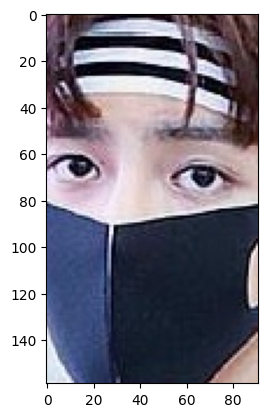

In [18]:
#displaying with mask images
img=mpimg.imread('/content/data/with_mask/with_mask_462.jpg')
imgplot=plt.imshow(img)
plt.show()

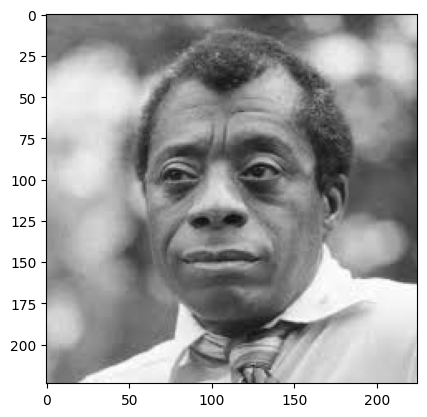

In [19]:
#displaying without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_2582.jpg')
imgplot=plt.imshow(img)
plt.show()

**Image proceesing**

1.Resize the images

2.Convert the images to numpy arrays

In [20]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[ 22,  29,  38],
        [ 22,  29,  37],
        [ 22,  29,  36],
        ...,
        [ 14,  21,  28],
        [ 14,  21,  29],
        [ 14,  21,  30]],

       [[ 22,  29,  38],
        [ 22,  29,  37],
        [ 22,  29,  36],
        ...,
        [ 14,  21,  28],
        [ 14,  21,  29],
        [ 14,  21,  30]],

       [[ 23,  28,  37],
        [ 23,  28,  37],
        [ 23,  28,  36],
        ...,
        [ 15,  21,  27],
        [ 15,  21,  28],
        [ 15,  21,  28]],

       ...,

       [[131, 175, 191],
        [131, 174, 191],
        [131, 174, 191],
        ...,
        [154, 128, 104],
        [155, 128, 104],
        [155, 127, 103]],

       [[135, 178, 195],
        [134, 177, 194],
        [133, 175, 192],
        ...,
        [153, 125, 101],
        [151, 124, 100],
        [150, 123,  99]],

       [[136, 179, 196],
        [134, 177, 194],
        [133, 175, 192],
        ...,
        [153, 125, 101],
        [151, 122,  98],
        [149, 121,  97]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[250, 250, 250],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [188, 188, 188],
        [226, 226, 226],
        [254, 254, 254]],

       [[251, 251, 251],
        [255, 255, 255],
        [248, 248, 248],
        ...,
        [197, 197, 197],
        [228, 228, 228],
        [253, 253, 253]],

       [[255, 255, 255],
        [254, 254, 254],
        [247, 247, 247],
        ...,
        [222, 222, 222],
        [240, 240, 240],
        [255, 255, 255]]

In [37]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.98039216, 0.98039216, 0.98039216],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Network(CNN)**

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [40]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 19ms/step - loss: 0.4714 - acc: 0.7795 - val_loss: 0.2785 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 15ms/step - loss: 0.2893 - acc: 0.8915 - val_loss: 0.2175 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2406 - acc: 0.9033 - val_loss: 0.2049 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1867 - acc: 0.9273 - val_loss: 0.1956 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 2s 14ms/step - loss: 0.1511 - acc: 0.9437 - val_loss: 0.3398 - val_acc: 0.9091


**Model evaluation**

In [43]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ',accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2941 - acc: 0.9067
Test Accuracy =  0.9066843390464783


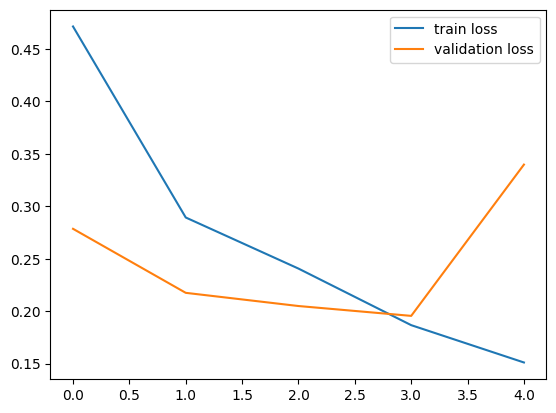

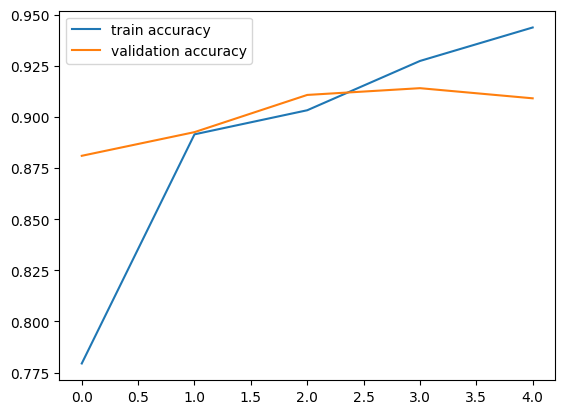

In [44]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

path of the image to be predicted: /content/Smiling-Business-Man.png


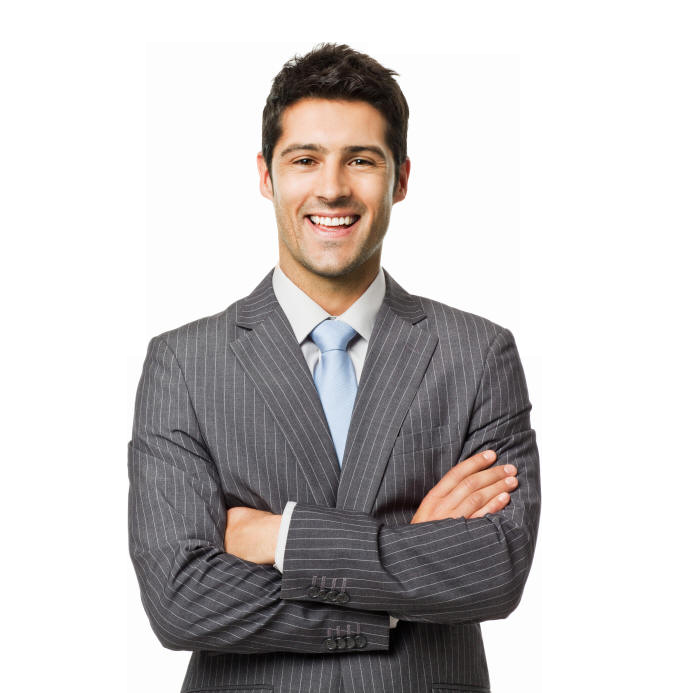

1/1 [==============================] - 0s 32ms/step
[[0.58900213 0.43399772]]
0
The person in the image is not wearing a mask


In [51]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')